**ALL THE PYTHON DATA SETS**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_excel('/content/drive/MyDrive/sales data.xlsx')

df

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0


In [11]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [12]:
print("This is The Not Count Shape: ", df.shape[0])

This is The Not Count Shape:  197430


**DATA TYPES USE**

In [13]:
df.dtypes

,0
State,object
City,object
Order Date,datetime64[ns]
Restaurant Name,object
Location,object
Category,object
Dish Name,object
Price (INR),float64
Rating,float64
Rating Count,int64


**# DESCRIBE USE**

In [14]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


**KPI'S**

- TOTAL SALES
- Average Rating
- Average Order Value
- Ratings Count
- Total Orders Use

In [15]:
total = df['Price (INR)'].sum()
print("\nThe Total Value: ", round(total, 2))


The Total Value:  53012505.77


In [16]:
average_rating = df['Rating'].mean()
print("\nThe Average Rating: ", round(average_rating, 2))


The Average Rating:  4.34


In [17]:
avg_order_value = df['Price (INR)'].mean()
print("\nThe AVG ORDER VALUE: ", round(avg_order_value, 2))


The AVG ORDER VALUE:  268.51


In [18]:
rating_count = df['Rating Count'].sum()
print("\nThe Rating Count: ", round(rating_count, 2))


The Rating Count:  5591574


In [19]:
total_orders = len(df)
print("\nThe Total Orders: ", round(total_orders, 2))


The Total Orders:  197430


**MONTHLY CHARTS USE**

- Daily Sales Trend
- Non Veg Item Check

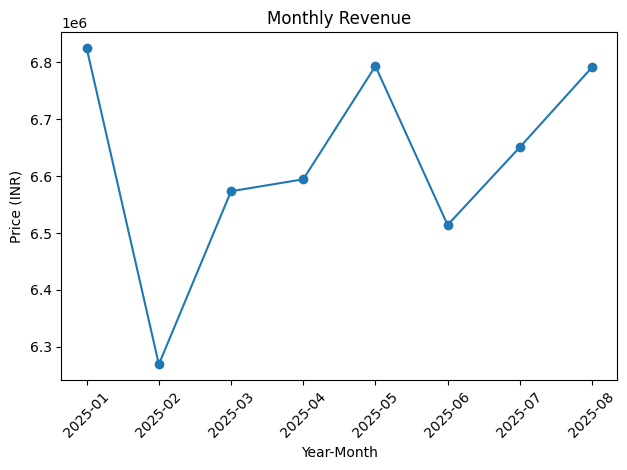

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create YearMonth column
df['YearMonth'] = df['Order Date'].dt.to_period("M").astype(str)

# Monthly revenue
monthly_revenue = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()

# Plot
plt.figure()
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Price (INR)")
plt.title("Monthly Revenue")
plt.tight_layout()
plt.show()

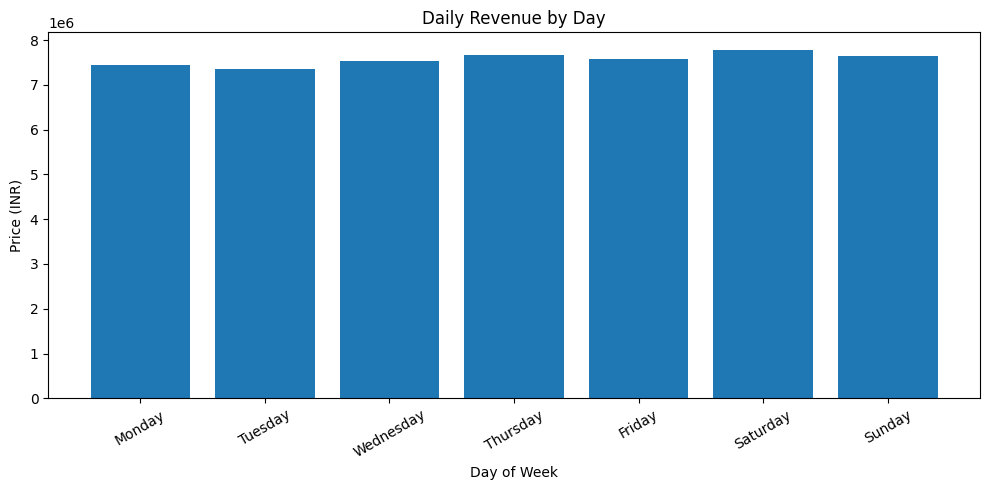

In [24]:
# Convert to datetime and get day name
df['DayName'] = df['Order Date'].dt.day_name()

# Group by day name
daily_revenue = (
    df.groupby('DayName')['Price (INR)']
      .sum()
      .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)

# Plot
plt.figure(figsize=(10,5))
plt.bar(daily_revenue.index, daily_revenue.values)
plt.xticks(rotation=30)
plt.xlabel("Day of Week")
plt.ylabel("Price (INR)")
plt.title("Daily Revenue by Day")
plt.tight_layout()
plt.show()

In [26]:
non_veg_items = ["chicken", "egg", "fish", "mutton",
                 "prawn", "biryani", "kabab", "kebab"
                 "non veg", "non-veg"]

df["Food Category"] = np.where(
    df["Dish Name"].str.lower().str.contains("|".join(non_veg_items), na=False),
    "Non-Veg",
    "Veg"
)

In [27]:
food_reven = (
    df.groupby('Food Category')['Price (INR)']
    .sum()
    .reset_index()
)

In [31]:
from matplotlib import text
fig = px.pie(
   food_reven,
   values = 'Price (INR)',
   names = 'Food Category',
   hole=0.5,
   title= "The Food Category Items In The List"
)

fig.update_traces(
    textinfo = "percent+label",
    pull = [0.05, 0]
)

fig.update_layout(
    height = 500,
    margin = dict(t=50, b=50, l=50, r=50)
)

fig.show()

**# MAKING THE TOTAL SALES BY STATE**

- Quaterly Performace Summary

In [34]:
fig = px.bar(
    df.groupby("State", as_index=False)["Price (INR)"]
    .sum()
    .sort_values(by="Price (INR)", ascending=False),
    x = "Price (INR)",
    y = "State",
    orientation = "h",
    title = "Revenue By State (INR) Using Plotly"
)

fig.update_layout(height= 600, yaxis= dict(autorange="reversed"))
fig.show()

In [37]:
# Convert Order Date to datetime
df["Order_Date"] = pd.to_datetime(df["Order Date"])

# Create Quarter column
df["Quarter"] = df["Order_Date"].dt.to_period("Q").astype(str)

# Quarterly summary
quarterly_summary = (
    df.groupby("Quarter", as_index=False)
      .agg(
          Total_Sales=("Price (INR)", "sum"),
          Avg_Rating=("Rating", "mean"),
          Total_Orders=("Order_Date", "count")
      )
      .sort_values("Quarter")
)

# Rounding values
quarterly_summary["Total_Sales"] = quarterly_summary["Total_Sales"].round(0)
quarterly_summary["Avg_Rating"] = quarterly_summary["Avg_Rating"].round(2)

quarterly_summary

,Quarter,Total_Sales,Avg_Rating,Total_Orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171
